# Predict the happiness score considering all the other factors mentioned in the dataset. 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
path = "https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv"
df = pd.read_csv(path)
df.head()
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [2]:
sns.set_style("darkgrid")
plt.rcParams["font.size"]=15
plt.rcParams["figure.figsize"]=(10,7)
plt.rcParams["figure.facecolor"]='FFB4E0'

In [3]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Text(0, 0.5, 'Economy (GDP per Capita)')

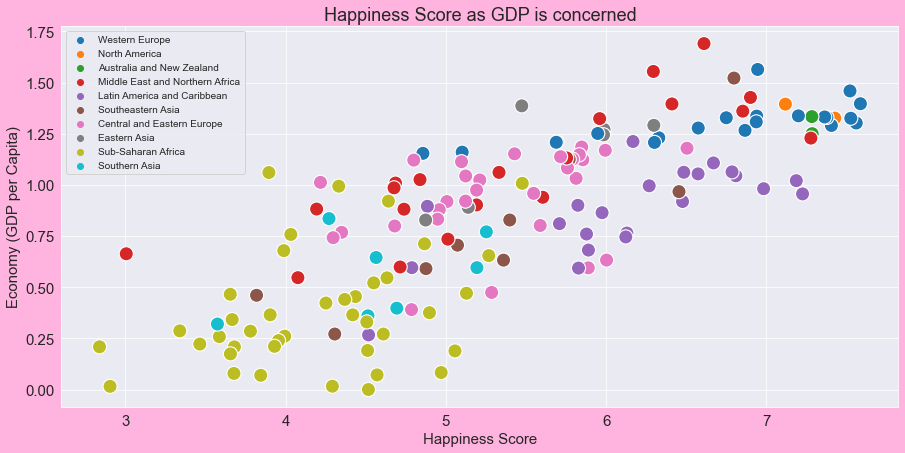

In [5]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Happiness Score as GDP is concerned')
sns.scatterplot(x = "Happiness Score", y = "Economy (GDP per Capita)",hue = "Region",s = 200 ,data=df)
plt.legend(loc='upper left', fontsize = '10')
plt.xlabel("Happiness Score")
plt.ylabel("Economy (GDP per Capita)")


Happiness Score as GDP is concerned

In [6]:
Region_GDP = df.groupby('Region')['Economy (GDP per Capita)'].sum()
Region_GDP

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

Text(0, 0.5, '')

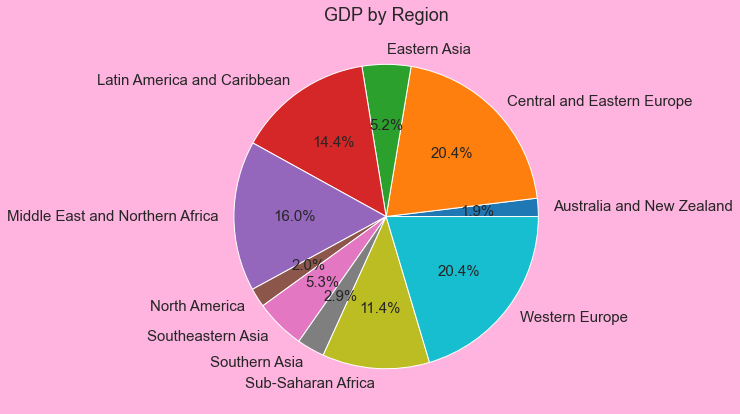

In [7]:
Region_GDP.plot.pie(autopct = '%1.1f%%')
plt.title ('GDP by Region')
plt.ylabel('')

In [8]:
all_countries = df.groupby("Region") [['Country']].count()
all_countries

,Country
Region,
Australia and New Zealand,2
Central and Eastern Europe,29
Eastern Asia,6
Latin America and Caribbean,22
Middle East and Northern Africa,20
North America,2
Southeastern Asia,9
Southern Asia,7
Sub-Saharan Africa,40


# HAPPINESS SCORE AS CORRUPTION IS CONCENED

In [9]:
Corruption = df.groupby("Region") [['Trust (Government Corruption)']].mean()
Corruption

,Trust (Government Corruption)
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


Text(0, 0.5, 'Trust (Government Corruption)')

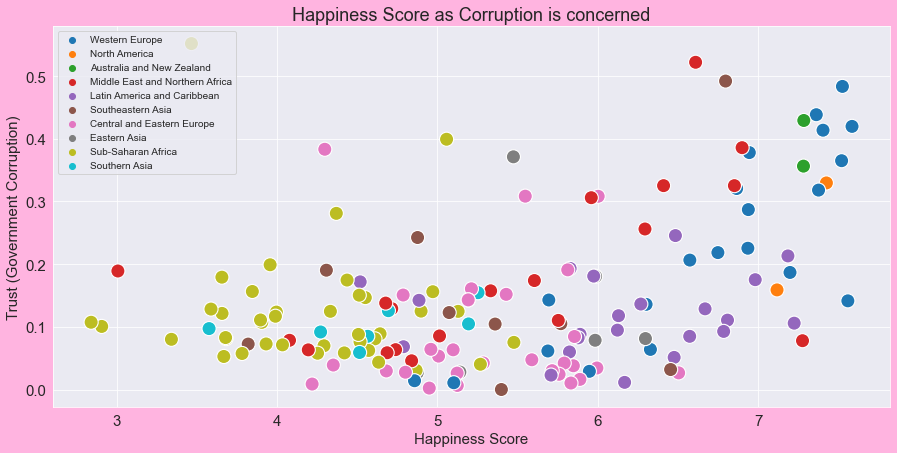

In [10]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Happiness Score as Corruption is concerned')
sns.scatterplot(x = "Happiness Score", y = "Trust (Government Corruption)",hue = "Region",s = 200 ,data=df)
plt.legend(loc='upper left', fontsize = '10')
plt.xlabel("Happiness Score")
plt.ylabel("Trust (Government Corruption)")


# HAPPINESS SCORE AS Health (Life Expectancy) IS CONCERNED

In [11]:
Health = df.groupby("Region") [['Health (Life Expectancy)']].mean()
Health

,Health (Life Expectancy)
Region,
Australia and New Zealand,0.919965
Central and Eastern Europe,0.718774
Eastern Asia,0.877388
Latin America and Caribbean,0.703870
Middle East and Northern Africa,0.705616
North America,0.883710
Southeastern Asia,0.677357
Southern Asia,0.540830
Sub-Saharan Africa,0.282332


Text(0, 0.5, 'Health (Life Expectancy)')

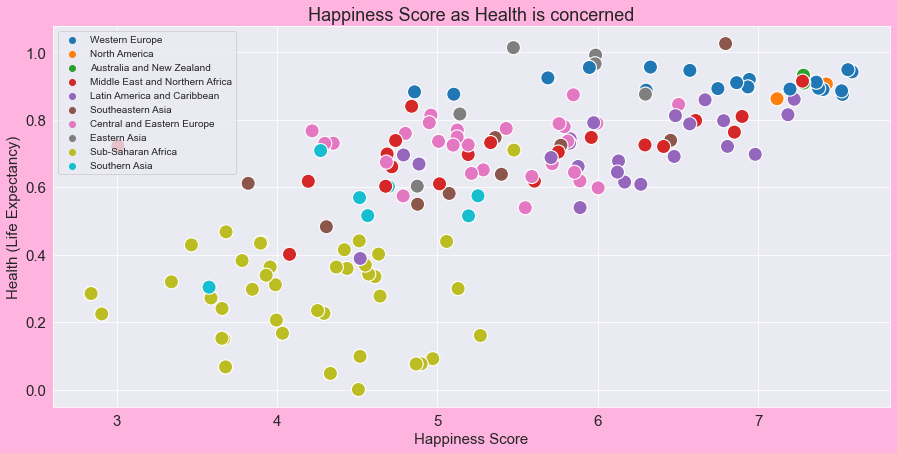

In [12]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Happiness Score as Health is concerned')
sns.scatterplot(x = "Happiness Score", y = "Health (Life Expectancy)",hue = "Region",s = 200 ,data=df)
plt.legend(loc='upper left', fontsize = '10')
plt.xlabel("Happiness Score")
plt.ylabel("Health (Life Expectancy)")


# HAPPINESS SCORE AS FAMILY IS CONCENED

In [13]:
H_Family = df.groupby("Region") [['Family']].mean()
H_Family

,Family
Region,
Australia and New Zealand,1.314450
Central and Eastern Europe,1.053042
Eastern Asia,1.099427
Latin America and Caribbean,1.104720
Middle East and Northern Africa,0.920490
North America,1.284860
Southeastern Asia,0.940468
Southern Asia,0.645321
Sub-Saharan Africa,0.809085


Text(0, 0.5, 'Family')

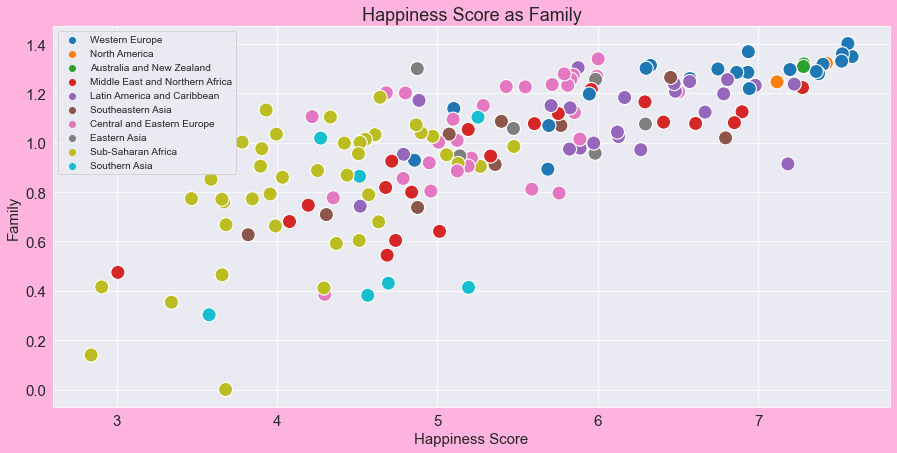

In [14]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Happiness Score as Family')
sns.scatterplot(x = "Happiness Score", y = "Family",hue = "Region",s = 200 ,data=df)
plt.legend(loc='upper left', fontsize = '10')
plt.xlabel("Happiness Score")
plt.ylabel("Family")


# Happiness score as Freedom is concerned


In [15]:
H_Freedom=df.groupby("Region") [['Freedom']].mean()
H_Family

,Family
Region,
Australia and New Zealand,1.314450
Central and Eastern Europe,1.053042
Eastern Asia,1.099427
Latin America and Caribbean,1.104720
Middle East and Northern Africa,0.920490
North America,1.284860
Southeastern Asia,0.940468
Southern Asia,0.645321
Sub-Saharan Africa,0.809085


Text(0, 0.5, 'Freedom')

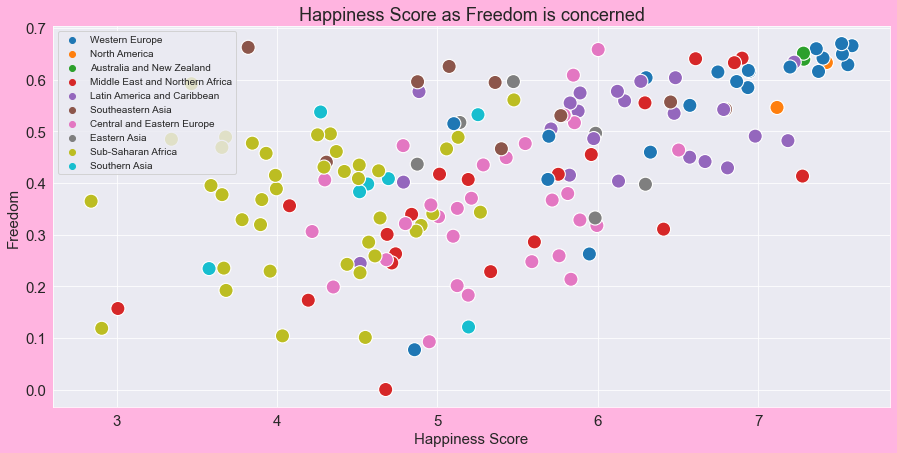

In [16]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Happiness Score as Freedom is concerned')
sns.scatterplot(x = "Happiness Score", y = "Freedom",hue = "Region",s = 200 ,data=df)
plt.legend(loc='upper left', fontsize = '10')
plt.xlabel("Happiness Score")
plt.ylabel("Freedom")


# HAPPINESS SCORE AS GENEROSITY IS CONCERNED

In [17]:
H_Generosity=df.groupby("Region") [['Generosity']].mean()
H_Generosity

,Generosity
Region,
Australia and New Zealand,0.455315
Central and Eastern Europe,0.152264
Eastern Asia,0.225885
Latin America and Caribbean,0.217788
Middle East and Northern Africa,0.190375
North America,0.429580
Southeastern Asia,0.419261
Southern Asia,0.341429
Sub-Saharan Africa,0.221137


Text(0, 0.5, 'Generosity')

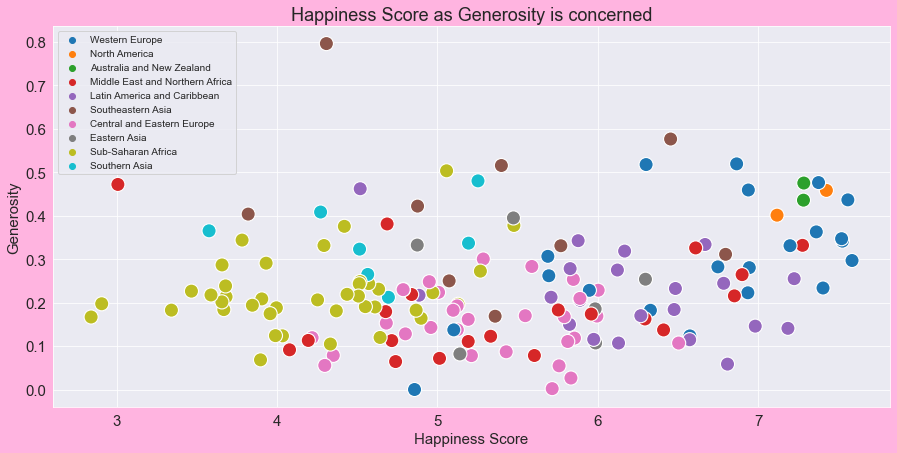

In [18]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Happiness Score as Generosity is concerned')
sns.scatterplot(x = "Happiness Score", y = "Generosity",hue = "Region",s = 200 ,data=df)
plt.legend(loc='upper left', fontsize = '10')
plt.xlabel("Happiness Score")
plt.ylabel("Generosity")


# Correlation :

In [19]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


# Correlation using Heatmap

In [20]:
import matplotlib.pyplot as plt

<AxesSubplot:>

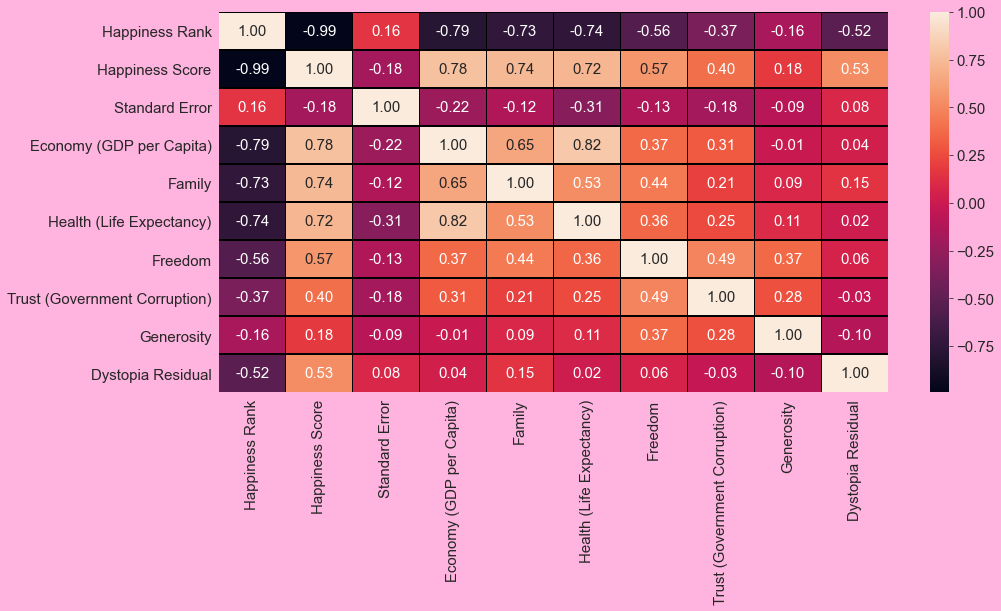

In [21]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot = True, linewidths=0.5,linecolor = "black",fmt = '.2f')

In [22]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<function matplotlib.pyplot.show(close=None, block=None)>

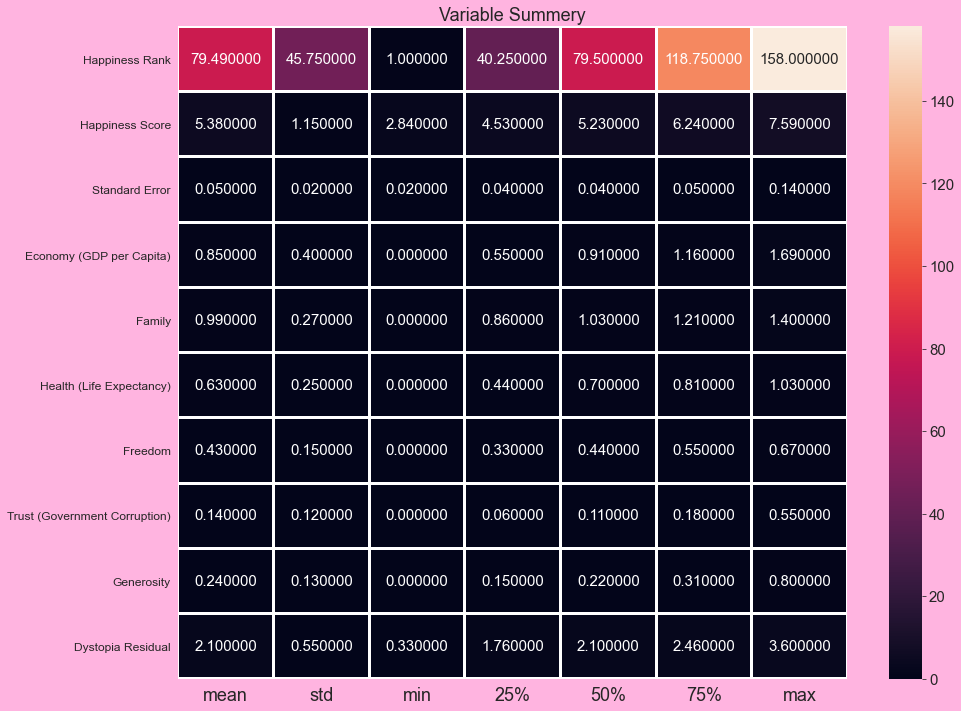

In [23]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summery")
plt.show

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# Outliers Checking

<Figure size 2160x6480 with 0 Axes>

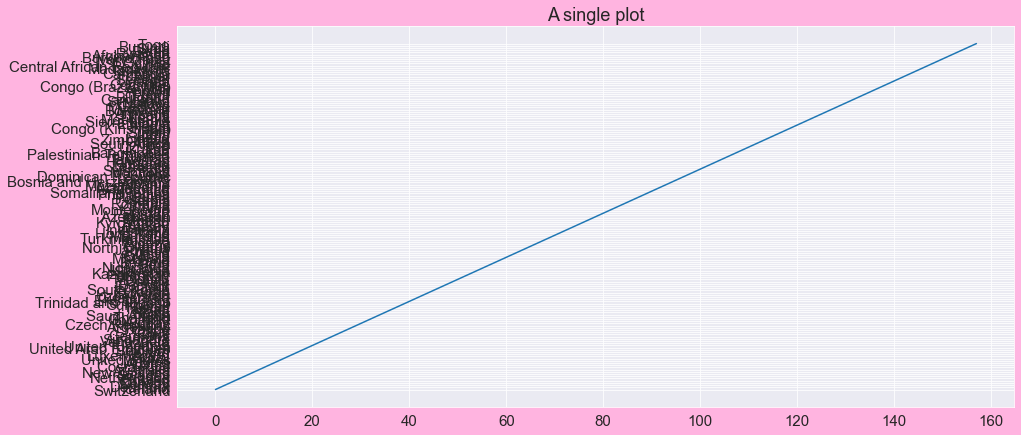

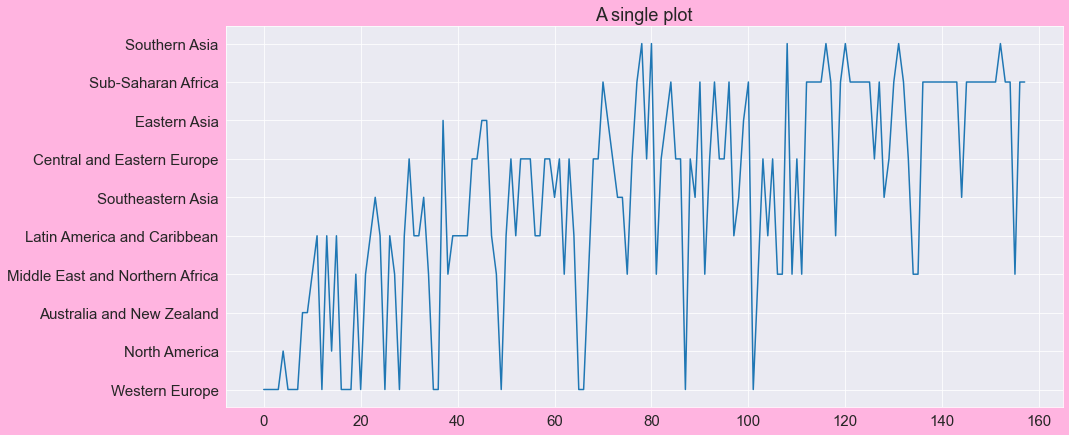

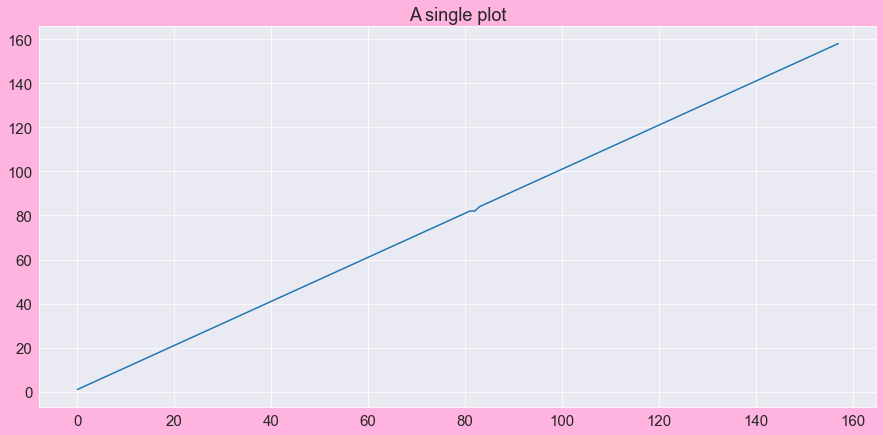

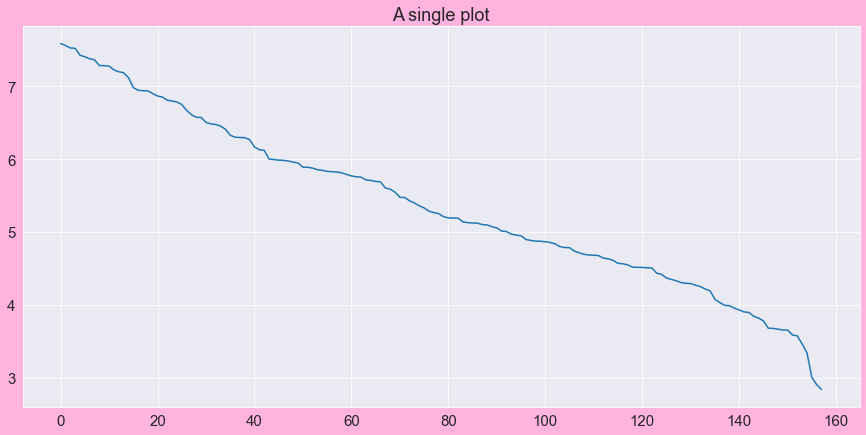

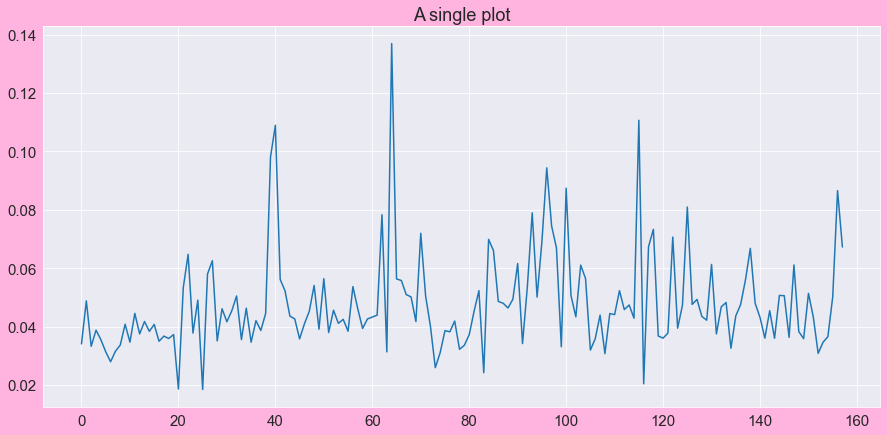

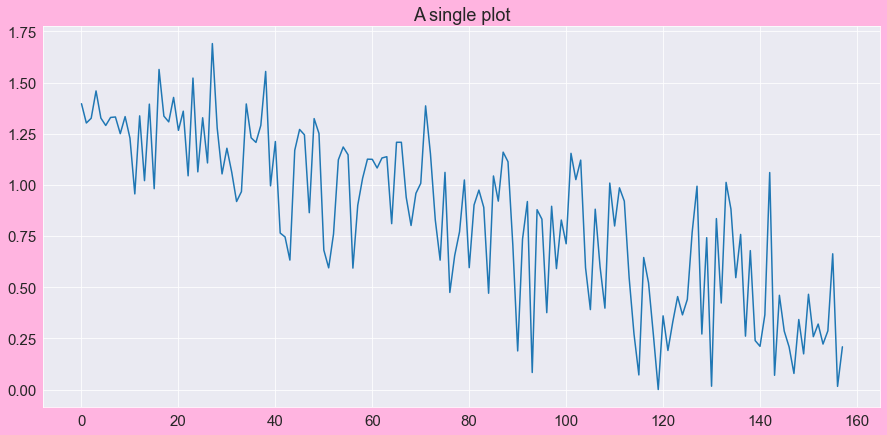

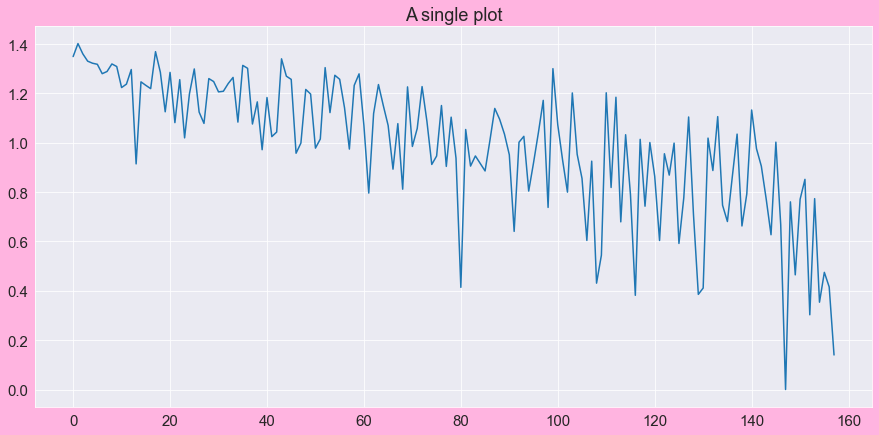

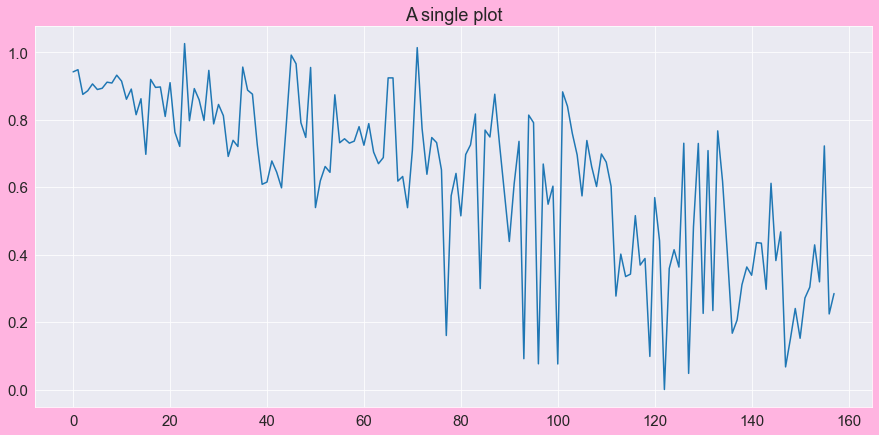

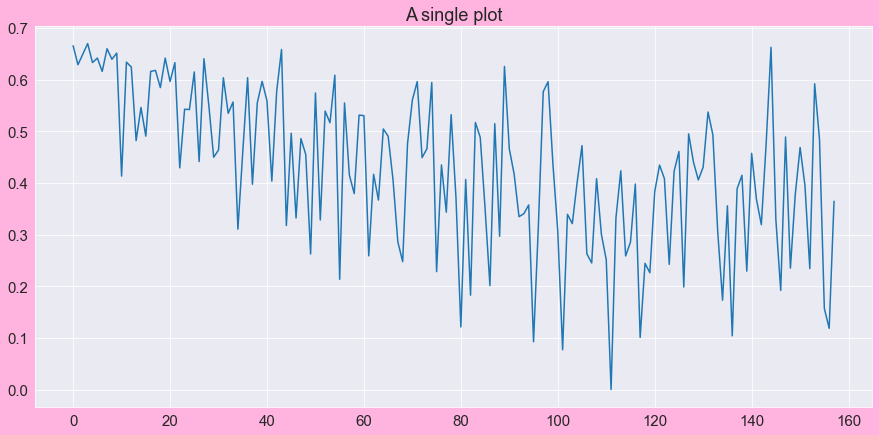

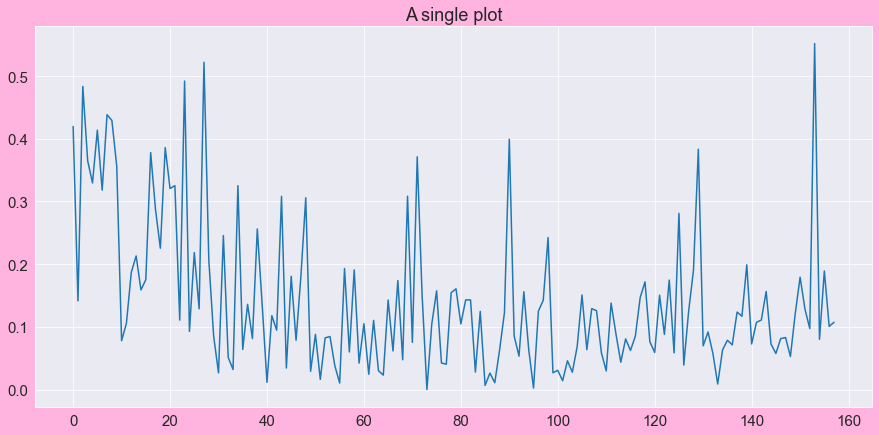

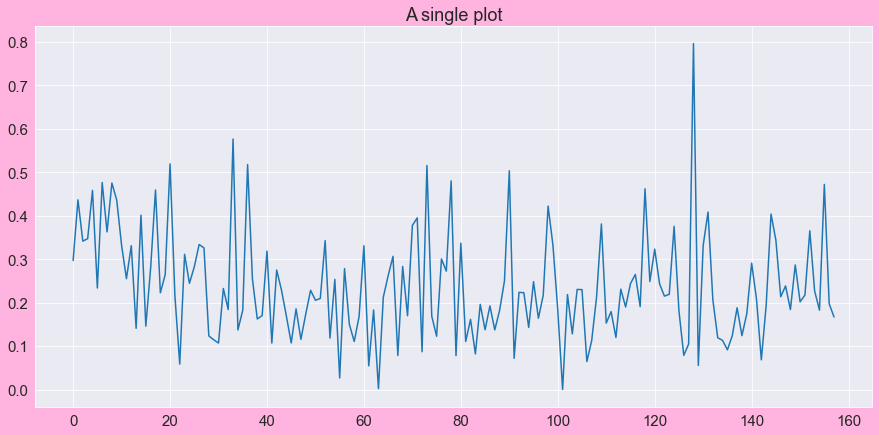

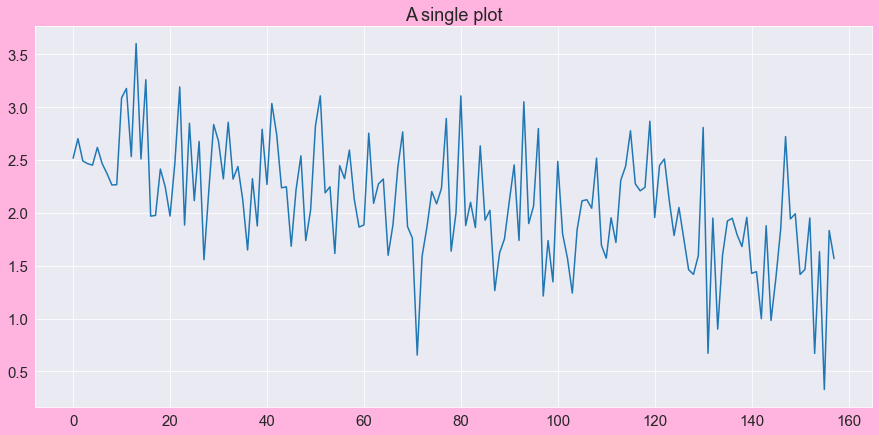

In [25]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    #plt.subplot(df[collist[i]],color='green',orient='r')
    #plt.tight_layout()  
    fig, ax = plt.subplots()
    ax.plot(df[collist[i]])
    ax.set_title('A single plot')


# Skewness


In [39]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

# NORMAL ISTRIBUTION CURVE

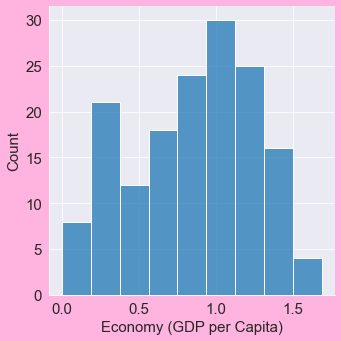

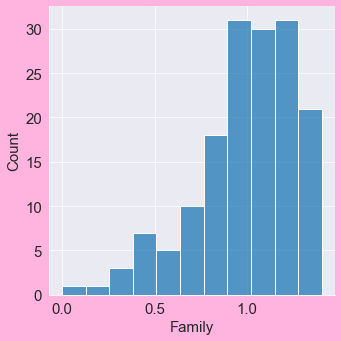

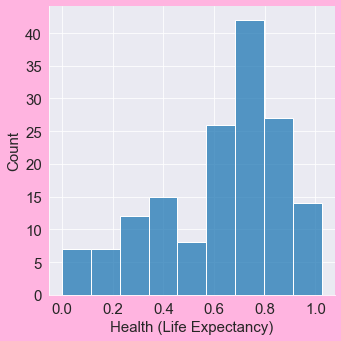

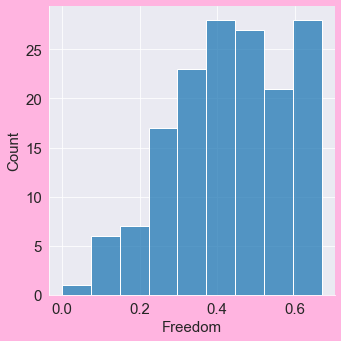

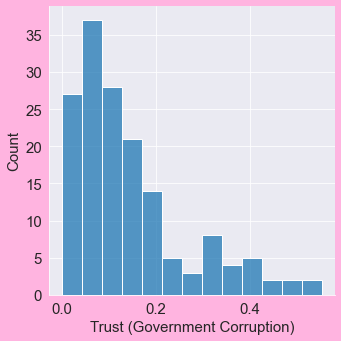

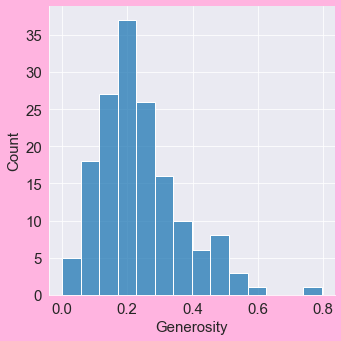

In [40]:
sns.displot(df["Economy (GDP per Capita)"])
sns.displot(df["Family"])
sns.displot(df["Health (Life Expectancy)"])
sns.displot(df["Freedom"])
sns.displot(df["Trust (Government Corruption)"])
sns.displot(df["Generosity"])


# TOP 10 & BOTTOM 10 HAPPIEST COUNTRIES 

In [63]:
ranking=df.head(10)
ranking

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
